In [2]:
import sys
sys.path.append('/Users/gary/anaconda/lib/python2.7/site-packages')

In [1]:
#import numpy as np
#import scipy as sp
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
%pylab inline
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [4]:
from IPython.html.widgets import *

In [5]:
macheps = finfo(float).eps
def diff(f,a): 
    epsilon = sqrt(macheps)*a
    return (f(a+epsilon)-f(a-epsilon))/(2*epsilon)

In [6]:
def f(x):
    return sin(x)
print(diff(f,1),cos(1))

(0.54030230641365051, 0.54030230586813977)


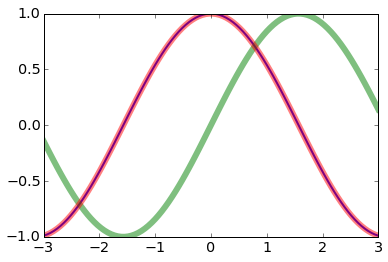

In [7]:
xrange = linspace(-3,3,100)
plot(xrange,diff(f,xrange),lw=2)
plot(xrange,f(xrange),lw=6,alpha=0.5)
plot(xrange,cos(xrange),lw=6,alpha=0.5)

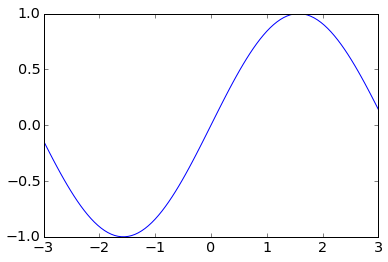

In [8]:
plot(xrange,f(xrange))

In [9]:
print(amin(f(xrange)))
maximum?

-0.999678914243


In [10]:
diff(f, linspace(-2,2,10))

array([-0.41614684,  0.01524018,  0.44366602,  0.78588726,  0.97541009,
        0.97541009,  0.78588726,  0.44366602,  0.01524018, -0.41614684])

In [11]:
x = linspace(0,1,100)
def pltsin(f):
    plot(x,sin(2*pi*x*f))

<function __main__.pltsin>

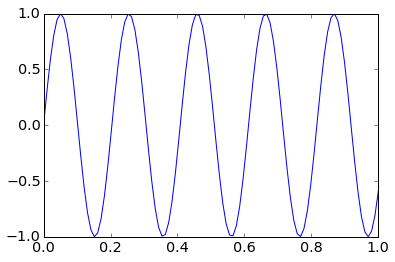

In [12]:
interact(pltsin, f=(1,10,0.1))

In [13]:
from scipy.integrate import odeint

In [14]:
def proj_force(y, t, k=0, m=1):
    dydt = zeros_like(y)
    dydt[0] = y[2]
    dydt[1] = y[3]
    dydt[2] = -k/m * y[2]
    dydt[3] = -9.8 - k/m * y[3]
    return dydt

t = linspace(0,2,1000)
v0 = 8.0
alpha = 80*pi/180
y0 = [0, 1, v0*cos(alpha), v0*sin(alpha)]

#result = odeint(proj_force, y0, t, args=(1,0.1))

In [15]:
def result(k):
    return odeint(proj_force, y0, t, args=(k,1))

In [16]:
import matplotlib.pyplot as plt

(0, 2.5)

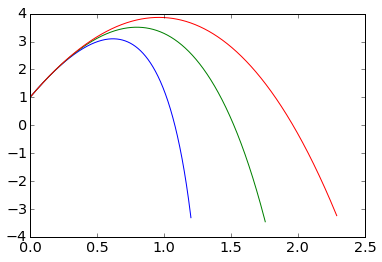

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(0,3)
ax.plot(result(1)[:,0],result(1)[:,1])
ax.plot(result(0.5)[:,0],result(0.5)[:,1])
ax.plot(result(0.2)[:,0],result(0.2)[:,1])
ax.set_xlim(0,2.5)

In [18]:
def plot_result(k):
    fig1 = plt.figure()
    ax1 = fig1.add_axes([0.1, 0.1, 1, 1])
    ax1.plot(result(k)[:,0],result(k)[:,1])
    ax1.set_xlim([0,2.5])
    ax1.set_ylim([0,4.5])
    ax1.set_aspect('auto')

<function __main__.plot_result>

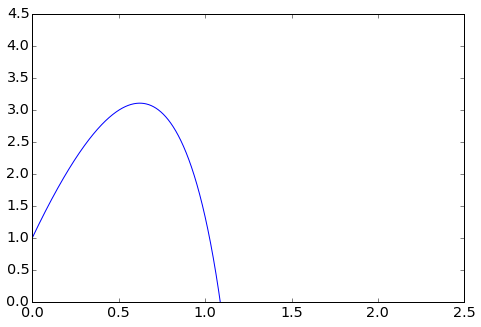

In [19]:
interact(plot_result, k=(0,2,0.01))